# **King County House Price Prediction**

![image](https://kingcounty.gov/~/media/Assessor/imagesV2/residential.ashx?la=en)

Created by: _**Delabrilliano Ismail**_

## **Context**

Home is one of the basic things in life that everyone need. Eventually, everyone will buy/sell house because it is a basic needs. This model is created to predict the house price based on several features (X variables).

The dataset that is being used is obtained through [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) in which the data contained homes sold between May 2014 and May 2015 on King County, USA.

## **Problem**

Home is one of the basic needs that human need to fulfill. But, Real estate is the least transparent industry in our economy. Housing prices keep changing day in and day out and sometimes are hyped rather than being based on valuation. Based on this phenomenon, this model hopefully can help people with limited resource to predict a house price that they want to buy.

### **Column Description**

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have - a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [85]:
## Import Package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Quick EDA**

In [86]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [87]:
## Checking Datatypes

df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

As we can see, there are 'id' columns that is irrelevant and we will later drop it. And, the 'date' columns has the wrong datatypes, but later we will extract the features and drop the original columns.

In [88]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [89]:
df.duplicated().sum()

0

We also can see that there are no missing value and duplicates from the dataset.

## **Data Preprocessing**

### Dropping Irrelevant Column

In [90]:
## Drop 'id' columns

df = df.drop(["id"],axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Features Extraction - Datetime

In [91]:
## Change 'date' columns datatypes into datetime

df['date'] = pd.to_datetime(df['date'])

In [92]:
## Extract features from date column

datedt = df['date'].dt
df['yearsold'] = datedt.year ## Extract year
df['monthsold'] = datedt.month ## Extract Month
df['daysold'] = datedt.day ## Extract Day
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yearsold,monthsold,daysold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [93]:
df.drop(columns='date', inplace=True) ## Drop 'date' columns
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yearsold,monthsold,daysold
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


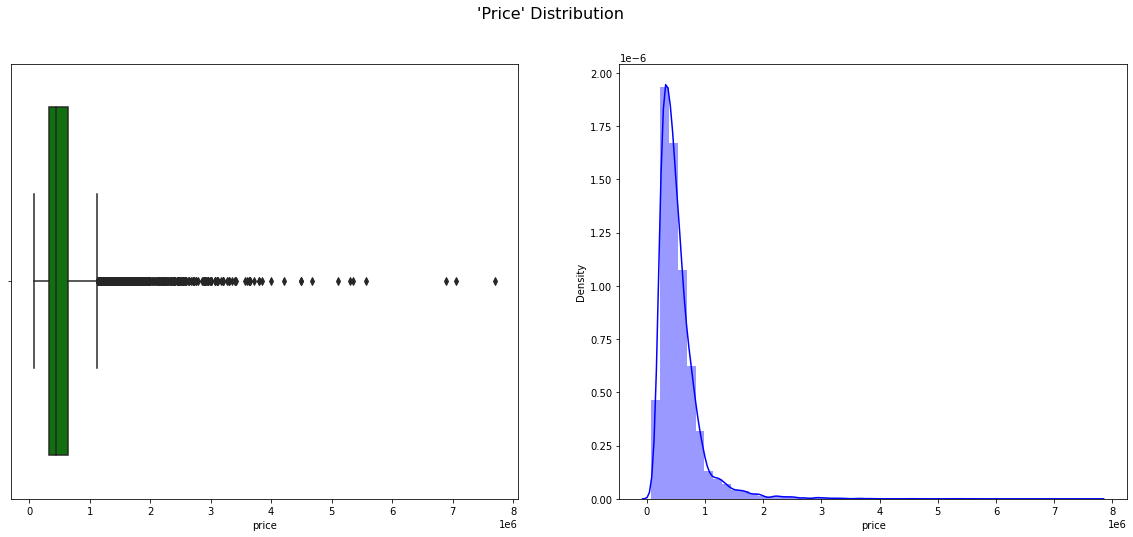

In [94]:
fig = plt.figure(figsize=(20,8))
fig.suptitle("'Price' Distribution", fontsize=16)

plt.subplot(1,2,1)
sns.boxplot(df['price'], color='green')

plt.subplot(1,2,2)
sns.distplot(df['price'], color='blue')

plt.show()

We can see that the target data is not normally distributed. Thus, we will use the spearman correlation test.

In [95]:
df.corr('spearman')['price'].sort_values(ascending=False)

price            1.000000
grade            0.658215
sqft_living      0.644191
sqft_living15    0.572290
sqft_above       0.541752
bathrooms        0.497160
lat              0.456409
bedrooms         0.344652
floors           0.322347
view             0.293931
sqft_basement    0.251704
waterfront       0.115089
yr_built         0.102038
yr_renovated     0.101876
sqft_lot         0.074939
long             0.063537
sqft_lot15       0.062766
condition        0.018490
yearsold         0.004138
zipcode         -0.008735
monthsold       -0.015494
daysold         -0.020159
Name: price, dtype: float64

We can see that 'grade' feature have the highest correlation with the price, followed by 'sqft_living' and 'sqft_living15'

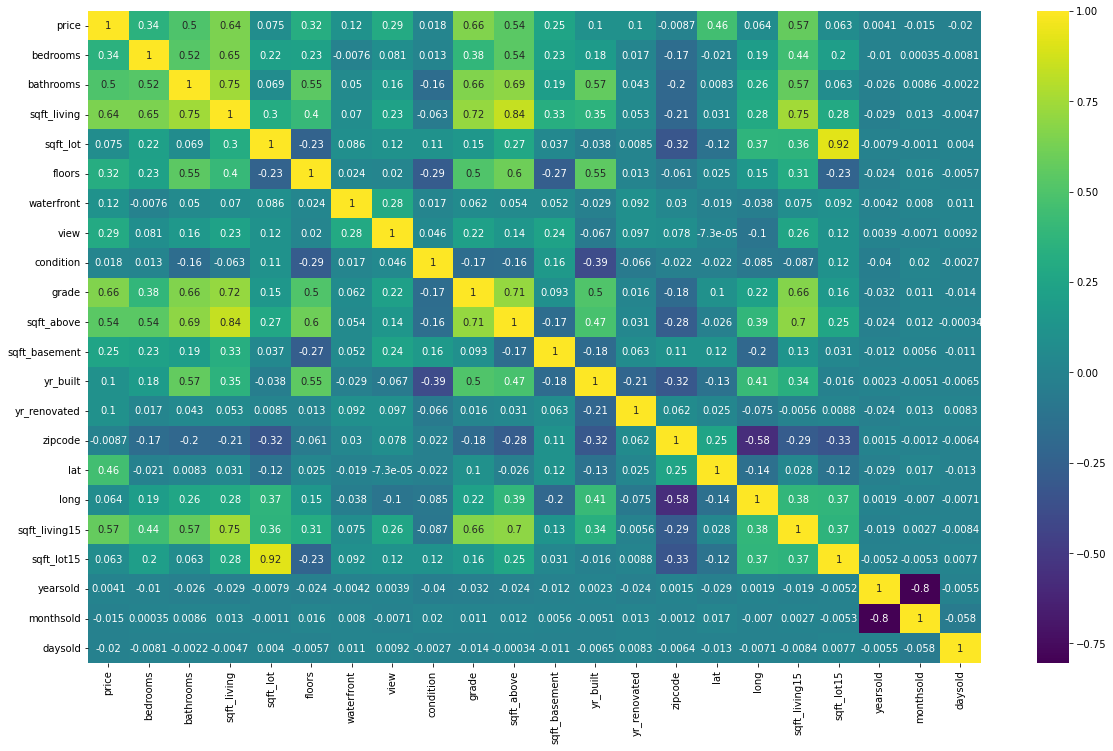

In [96]:
## Visualization of the correlation heatmap

plt.figure(figsize=(20,12))
sns.heatmap(df.corr('spearman'), annot=True, cmap='viridis')
plt.show()

## **Machine Learning Modeling**

### **Splitting Dataset**

In [97]:
## Create x and y variables

X = df.drop(columns='price')
y = df['price']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .15, random_state= 666)

### **Machine Learning Modelling**

**Linear Regression**

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
Model = LinearRegression ()

In [102]:
Model.fit(X_train, y_train)

LinearRegression()

## **Evaluation Metrics Calculation**

In [103]:
pred_train = Model.predict(X_train)

In [104]:
pred_test = Model.predict(X_test)

In [105]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [106]:
## Create def for creating evaluation matrix

def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [ ]:
## Evaluation Matrix for Linear Regression Training

r2_train, MAE_train, MSE_train, RMSE_train = Eva_Matrix(Model, X_train, y_train)

In [ ]:
## Evaluation Matrix for Linear Regression Testing

r2_test, MAE_test, MSE_test, RMSE_test = Eva_Matrix(Model, X_test, y_test)

### **Model Evaluation Metrics Results**

In [115]:
eva_LR = {
    'Training LinearReg' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Testing LinearReg' : [r2_test, MAE_test, MSE_test, RMSE_test]
}

pd.DataFrame(eva_LR, index=['R Squared', 'MAE', 'MSE', 'RMSE']).T

,R Squared,MAE,MSE,RMSE
Training LinearReg,0.702282,124698.100164,3.931458e+10,198279.034634
Testing LinearReg,0.695022,126736.938548,4.580990e+10,214032.470294


The evaluation matrix calculation results for the Linear Regression can be seen above. Let's try to improve the model scoring using Polynomial features. 

## **Machine Learning Model Improvement (Feature Engineering) with Polynomial**

In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
Poly = PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)

In [118]:
Poly = Poly.fit(X_train)

In [119]:
X_trainPoly = Poly.transform(X_train)
X_testPoly = Poly.transform(X_test)

In [120]:
df_XtrainPoly = pd.DataFrame(X_trainPoly)
df_XtestPoly = pd.DataFrame(X_testPoly)

### **Training Model for Polynomial regression**

In [121]:
Model_PF = LinearRegression()

In [122]:
Model_PF.fit(df_XtrainPoly, y_train)

LinearRegression()

In [123]:
PF_train = Model_PF.predict(df_XtrainPoly)
PF_test = Model_PF.predict(df_XtestPoly)

### **Polynomial Evaluation Metrics Calculation**

**Evaluation Metrics for Training Data**

In [247]:
## Evaluation Matrix for Polynomial Regression Training

r2_train_PF, MAE_train_PF, MSE_train_PF, RMSE_train_PF = Eva_Matrix(Model_PF, df_XtrainPoly, y_train)

**Evaluation Metrics for Training Data**

In [249]:
## Evaluation Matrix for Polynomial Regression Testing

r2_test_PF, MAE_test_PF, MSE_test_PF, RMSE_test_PF = Eva_Matrix(Model_PF, df_XtestPoly, y_test)

In [250]:
eva_LR_PF = {
    'Training LinearReg' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Testing LinearReg' : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Training LinearReg PF' : [r2_train_PF, MAE_train_PF, MSE_train_PF, RMSE_train_PF],
    'Testing LinearReg PF' : [r2_test_PF, MAE_test_PF, MSE_test_PF, RMSE_test_PF]
}

pd.DataFrame(eva_LR_PF, index=['R Squared', 'MAE', 'MSE', 'RMSE']).T

,R Squared,MAE,MSE,RMSE
Training LinearReg,0.702282,124698.100164,3.931458e+10,198279.034634
Testing LinearReg,0.695022,126736.938548,4.580990e+10,214032.470294
Training LinearReg PF,0.816972,100745.295124,2.416944e+10,155465.231571
Testing LinearReg PF,0.822761,101621.023961,2.662253e+10,163164.125498


We can see that the model evaluation matrix score has improved after using the polynomial features. Now let's proceed to test other algorithms and tuning.

## **Machine Learning Improvement with Other Algorithm and Manual Tuning**

In [133]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [134]:
Model_R_PF = Ridge()
Model_L_PF = Lasso()
Model_E_PF = ElasticNet()

In [135]:
Model_R_PF.fit(df_XtrainPoly, y_train)

Ridge()

In [136]:
Model_L_PF.fit(df_XtrainPoly, y_train)

Lasso()

In [137]:
Model_E_PF.fit(df_XtrainPoly, y_train)

ElasticNet()

In [138]:
## Evaluation Matrix of Ridge Training Data

r2_R_tr_PF, MAE_R_tr_PF, MSE_R_tr_PF, RMSE_R_tr_PF = Eva_Matrix(Model_R_PF, df_XtrainPoly, y_train)

In [139]:
## Evaluation Matrix of Ridge Testing Data

r2_R_ts_PF, MAE_R_ts_PF, MSE_R_ts_PF, RMSE_R_ts_PF = Eva_Matrix(Model_R_PF, df_XtestPoly, y_test)

In [140]:
## Evaluation Matrix of Lasso Training Data

r2_L_tr_PF, MAE_L_tr_PF, MSE_L_tr_PF, RMSE_L_tr_PF = Eva_Matrix(Model_L_PF, df_XtrainPoly, y_train)

In [141]:
## Evaluation Matrix of Lasso Testing Data

r2_L_ts_PF, MAE_L_ts_PF, MSE_L_ts_PF, RMSE_L_ts_PF = Eva_Matrix(Model_L_PF, df_XtestPoly, y_test)

In [142]:
## Evaluation Matrix of ElasticNet Training Data

r2_E_tr_PF, MAE_E_tr_PF, MSE_E_tr_PF, RMSE_E_tr_PF = Eva_Matrix(Model_E_PF, df_XtrainPoly, y_train)

In [143]:
## Evaluation Matrix of ElasticNet Testing Data

r2_E_ts_PF, MAE_E_ts_PF, MSE_E_ts_PF, RMSE_E_ts_PF = Eva_Matrix(Model_E_PF, df_XtestPoly, y_test)

In [252]:
eva_matrix_Reg_PF = {
    'Poly LinearReg Training' : [r2_train_PF, MAE_train_PF, MSE_train_PF, RMSE_train_PF],
    'Poly LinearReg Testing' : [r2_test_PF, MAE_test_PF, MSE_test_PF, RMSE_test_PF],
    'Poly Ridge Training' : [r2_R_tr_PF, MAE_R_tr_PF, MSE_R_tr_PF, RMSE_R_tr_PF],
    'Poly Ridge Testing' : [r2_R_ts_PF, MAE_R_ts_PF, MSE_R_ts_PF, RMSE_R_ts_PF],
    'Poly Lasso Training' : [r2_L_tr_PF, MAE_L_tr_PF, MSE_L_tr_PF, RMSE_L_tr_PF],
    'Poly Lasso Testing' : [r2_L_ts_PF, MAE_L_ts_PF, MSE_L_ts_PF, RMSE_L_ts_PF],
    'Poly ElasticNet Training' : [r2_E_tr_PF, MAE_E_tr_PF, MSE_E_tr_PF, RMSE_E_tr_PF],
    'Poly ElasticNet Testing' : [r2_E_ts_PF, MAE_E_ts_PF, MSE_E_ts_PF, RMSE_E_ts_PF],
}

eva_matrix_Reg_PF = pd.DataFrame(eva_matrix_Reg_PF, index=['R2', 'MAE', 'MSE', 'RMSE']).T

eva_matrix_Reg_PF

,R2,MAE,MSE,RMSE
Poly LinearReg Training,0.816972,100745.295124,2.416944e+10,155465.231571
Poly LinearReg Testing,0.822761,101621.023961,2.662253e+10,163164.125498
Poly Ridge Training,0.815343,100844.679198,2.438456e+10,156155.565730
Poly Ridge Testing,0.822415,101677.859641,2.667451e+10,163323.334169
Poly Lasso Training,0.782576,109029.471721,2.871151e+10,169444.710150
Poly Lasso Testing,0.794150,111048.541865,3.092013e+10,175841.213833
Poly ElasticNet Training,0.780965,109278.038014,2.892417e+10,170071.086563
Poly ElasticNet Testing,0.796367,111180.853343,3.058707e+10,174891.580821


## **Tuning**

In [145]:
## Create def for Manual Tuning

def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []

    for i in Alpha:
        model_R = Model(alpha=i)
        model_R.fit(X_train, y_train)
        y_pred_tr = model_R.predict(X_train)
        R2_train = r2_score(y_train,y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = model_R.predict(X_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)

    return train_r, test_r

In [146]:
## Create Alpha Range

Alpha = np.arange(0,10,0.001)

**Ridge**

In [239]:
# Tuning for Ridge algorithm

train_Ridge, test_Ridge = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, Ridge)

In [240]:
# Find maximum Ridge test score from Alpha

Alpha[np.argmax(test_Ridge)] ## Result alpha= 0.001

0.4

In [149]:
Model_R_PF_tn = Ridge(alpha=0.001)

In [150]:
Model_R_PF_tn.fit(df_XtrainPoly, y_train)

Ridge(alpha=0.001)

**Lasso**

In [220]:
## Tuning for Lasso algorithm

train_lasso, test_lasso = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, Lasso)

In [222]:
# Find maximum Lasso test score from Alpha

Alpha[np.argmax(test_lasso)] ## Result alpha= 9.899999999999997

9.899999999999997

In [224]:
Model_L_PF_tn = Lasso(alpha=9.899999999999997)

In [225]:
Model_L_PF_tn.fit(df_XtrainPoly, y_train)

Lasso(alpha=9.899999999999997)

**ElasticNet**

In [221]:
## Tuning for Elasticnet Algorithm

train_Enet, test_Enet = Manual_Tune(Alpha, df_XtrainPoly, df_XtestPoly, y_train, y_test, ElasticNet) 

In [223]:
# Find maximum ElasticNet test score from Alpha

Alpha[np.argmax(test_Enet)] ## Result alpha= 9.899999999999997

9.899999999999997

In [226]:
Model_E_PF_tn = ElasticNet(alpha=9.899999999999997)

In [228]:
Model_E_PF_tn.fit(df_XtrainPoly, y_train)

ElasticNet(alpha=9.899999999999997)

## **Evaluation Matrix Calculation after Tuning**

In [229]:
## Evaluation Matrix of Ridge Tuned Training Data

r2_R_tr_PF_tn, MAE_R_tr_PF_tn, MSE_R_tr_PF_tn, RMSE_R_tr_PF_tn = Eva_Matrix(Model_R_PF_tn, df_XtrainPoly, y_train)

In [230]:
## Evaluation Matrix of Ridge Tuned Testing Data

r2_R_ts_PF_tn, MAE_R_ts_PF_tn, MSE_R_ts_PF_tn, RMSE_R_ts_PF_tn = Eva_Matrix(Model_R_PF_tn, df_XtestPoly, y_test)

In [231]:
## Evaluation Matrix of Lasso Tuned Training Data

r2_L_tr_PF_tn, MAE_L_tr_PF_tn, MSE_L_tr_PF_tn, RMSE_L_tr_PF_tn = Eva_Matrix(Model_L_PF_tn, df_XtrainPoly, y_train)

In [232]:
## Evaluation Matrix of Lasso Tuned Testing Data

r2_L_ts_PF_tn, MAE_L_ts_PF_tn, MSE_L_ts_PF_tn, RMSE_L_ts_PF_tn = Eva_Matrix(Model_L_PF_tn, df_XtestPoly, y_test)

In [233]:
## Evaluation Matrix of ElasticNet Tuned Training Data

r2_E_tr_PF_tn, MAE_E_tr_PF_tn, MSE_E_tr_PF_tn, RMSE_E_tr_PF_tn = Eva_Matrix(Model_E_PF_tn, df_XtrainPoly, y_train)

In [234]:
## Evaluation Matrix of ElasticNet Tuned Testing Data

r2_E_ts_PF_tn, MAE_E_ts_PF_tn, MSE_E_ts_PF_tn, RMSE_E_ts_PF_tn = Eva_Matrix(Model_E_PF_tn, df_XtestPoly, y_test)

## **Final Evaluation Matrix** 

In [241]:
eva_matrix_Reg_PF_tn = {
    'Poly LinearReg Training' : [r2_train_PF, MAE_train_PF, MSE_train_PF, RMSE_train_PF],
    'Poly LinearReg Testing' : [r2_test_PF, MAE_test_PF, MSE_test_PF, RMSE_test_PF],
    'Poly Ridge Tuned Training' : [r2_R_tr_PF_tn, MAE_R_tr_PF_tn, MSE_R_tr_PF_tn, RMSE_R_tr_PF_tn],
    'Poly Ridge Tuned Testing' : [r2_R_ts_PF_tn, MAE_R_ts_PF_tn, MSE_R_ts_PF_tn, RMSE_R_ts_PF_tn],
    'Poly Lasso Tuned Training' : [r2_L_tr_PF_tn, MAE_L_tr_PF_tn, MSE_L_tr_PF_tn, RMSE_L_tr_PF_tn],
    'Poly Lasso Tuned Testing' : [r2_L_ts_PF_tn, MAE_L_ts_PF_tn, MSE_L_ts_PF_tn, RMSE_L_ts_PF_tn],
    'Poly ElasticNet Tuned Training' : [r2_E_tr_PF_tn, MAE_E_tr_PF_tn, MSE_E_tr_PF_tn, RMSE_E_tr_PF_tn],
    'Poly ElasticNet Tuned Testing' : [r2_E_ts_PF_tn, MAE_E_ts_PF_tn, MSE_E_ts_PF_tn, RMSE_E_ts_PF_tn],
}

eva_matrix_tn = pd.DataFrame(eva_matrix_Reg_PF_tn, index=['R2', 'MAE', 'MSE', 'RMSE']).T

**Before Tuning**

In [255]:
eva_matrix_Reg_PF

,R2,MAE,MSE,RMSE
Poly LinearReg Training,0.816972,100745.295124,2.416944e+10,155465.231571
Poly LinearReg Testing,0.822761,101621.023961,2.662253e+10,163164.125498
Poly Ridge Training,0.815343,100844.679198,2.438456e+10,156155.565730
Poly Ridge Testing,0.822415,101677.859641,2.667451e+10,163323.334169
Poly Lasso Training,0.782576,109029.471721,2.871151e+10,169444.710150
Poly Lasso Testing,0.794150,111048.541865,3.092013e+10,175841.213833
Poly ElasticNet Training,0.780965,109278.038014,2.892417e+10,170071.086563
Poly ElasticNet Testing,0.796367,111180.853343,3.058707e+10,174891.580821


**After Tuning**

In [256]:
eva_matrix_tn

,R2,MAE,MSE,RMSE
Poly LinearReg Training,0.816972,100745.295124,2.416944e+10,198279.034634
Poly LinearReg Testing,0.822761,101621.023961,2.662253e+10,214032.470294
Poly Ridge Tuned Training,0.816418,100776.043253,2.424257e+10,155700.251956
Poly Ridge Tuned Testing,0.822886,101515.859893,2.660381e+10,163106.736052
Poly Lasso Tuned Training,0.782577,109032.205517,2.871130e+10,169444.101480
Poly Lasso Tuned Testing,0.794195,111060.564700,3.091340e+10,175822.077678
Poly ElasticNet Tuned Training,0.780357,109383.308598,2.900448e+10,170307.020487
Poly ElasticNet Tuned Testing,0.797007,111116.998255,3.049105e+10,174616.852688


We can see that from the tuning process, the evaluation score has slightly improved.

## **Conclusion**

**Best Model**

As we can see from the final evaluation matrix, the best scoring model is Polynomial with Ridge Algorithm after Tuning.

**Impact**

With this model, people who wants to buy a home on King County specifically, can predict the price of a home that they want to buy. It will make the people more easier to find a home that's suitable with their budget. Also, this model can help people who are seeking to buy a home to give an opening bid of the home that they want to buy. 